In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data.xlsx", sheet_name = None)
data.keys()

odict_keys(['vc', '0V 0,1M LiClO4', '-0,3V 0,1M LiClO4', '0V 0,5M LiClO4', '-0,3V 0,5M LiClO4', '0V 1M LiClO4', '-0,3V 1M LiClO4', '0V 0,1M Na2SO4', '-0,3V 0,1M Na2SO4', '0V 0,1M AcCN', '-0,3V 0,1 M AcCN', 'RC', 'Oxygen'])

# Voltametria ciclica

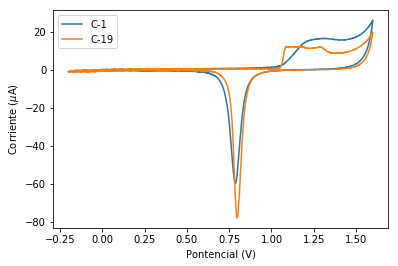

In [3]:
x1, y1 = data['vc'][['X1', 'Y1']].values[10:].T
x2, y2 = data['vc'][['X2', 'Y2']].values[10:].T

plt.plot(x1, y1*1e6, label = "C-1")
plt.plot(x2, y2*1e6, label = "C-19")

plt.xlabel("Pontencial (V)")
plt.ylabel("Corriente ($\mu$A)")
plt.legend()

plt.savefig("voltametrias.png", dpi = 300)
plt.show()

# Impedancias

In [4]:
freq = np.logspace(0, 6, 61)

In [5]:
voltage_1 = ['0V 0,1M LiClO4', '0V 0,5M LiClO4', '0V 1M LiClO4'] 
voltage_2 = ['-0,3V 0,1M LiClO4', '-0,3V 0,5M LiClO4', '-0,3V 1M LiClO4']

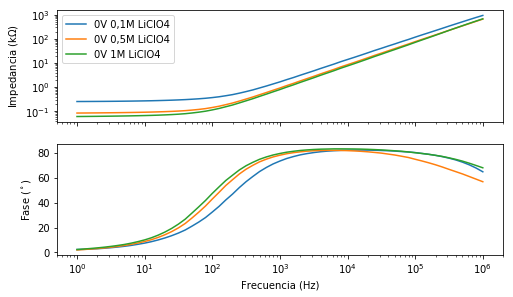

In [6]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 4.5), sharex = True)

for sheet in voltage_1:
    x, y = data[sheet].values.T / 1e3
    
    p = np.rad2deg(np.arctan2(y, x))
    m = abs(x + 1j*y)

    ax1.plot(freq, m, label = sheet)
    ax2.plot(freq, p)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("LiClO4_0,0.png", dpi = 300)
plt.show()

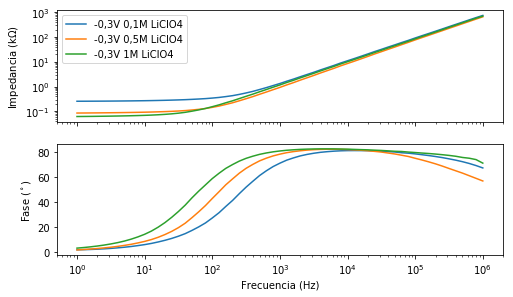

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 4.5), sharex = True)

for sheet in voltage_2:
    x, y = data[sheet].values.T / 1e3
    
    p = np.rad2deg(np.arctan2(y, x))
    m = abs(x + 1j*y)

    ax1.plot(freq, m, label = sheet)
    ax2.plot(freq, p)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("LiClO4_0,3.png", dpi = 300)
plt.show()

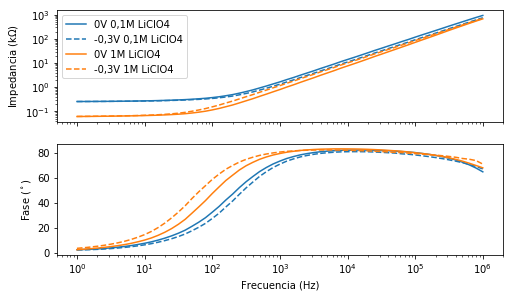

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 4.5), sharex = True)

voltage_11 = [voltage_1[0], voltage_1[2]]
voltage_22 = [voltage_2[0], voltage_2[2]]

for i in range(2):
    x, y = data[voltage_11[i]].values.T / 1e3
    
    p = np.rad2deg(np.arctan2(y, x))
    m = abs(x + 1j*y)

    c = ax1.plot(freq, m, label = voltage_11[i])[0].get_color()
    ax2.plot(freq, p)
    
    x, y = data[voltage_22[i]].values.T / 1e3
    
    p = np.rad2deg(np.arctan2(y, x))
    m = abs(x + 1j*y)

    ax1.plot(freq, m, "--", color = c, label = voltage_22[i])
    ax2.plot(freq, p, "--", color = c)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("LiClO4_voltage.png", dpi = 300)
plt.show()

In [9]:
iones = ['0V 0,1M LiClO4', '0V 0,1M Na2SO4', '0V 0,1M AcCN', 'RC']

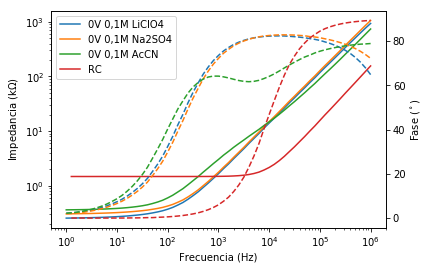

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for ion in iones:
    x, y = data[ion].values.T / 1e3
    p = np.rad2deg(np.arctan2(y, x))
    m = abs(x + 1j*y)
    
    c = ax1.plot(freq, m, label = ion)[0].get_color()
    ax2.plot(freq, p, '--', color = c)

ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Impedancia (k$\Omega$)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

ax2.set_ylabel('Fase ($^\circ$)')

plt.savefig("iones.png", dpi = 300)
plt.show()